<a href="https://colab.research.google.com/github/sarthakb202005/TESS-TOIs/blob/main/TESStask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from astropy.io import fits

fits_file = '/content/tica-s0027-4-3_97.096788_-65.579312_5x5_astrocut.fits'

with fits.open(fits_file) as hdul:

    hdul.info()

    # Access the data in the first extension (usually where lightcurve data is stored)
    data = hdul[1].data

    print("Column Names:", data.columns)

Filename: /content/tica-s0027-4-3_97.096788_-65.579312_5x5_astrocut.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY     1   PrimaryHDU      57   ()      
  1  PIXELS      1   BinTableHDU    277   3360R x 11C   [D, J, 25J, 25E, 25E, 25E, 25E, J, E, E, 38A]   
  2  APERTURE    1   ImageHDU        82   (5, 5)   int32   
Column Names: ColDefs(
    name = 'TIME'; format = 'D'; unit = 'BJD - 2457000, days'; disp = 'D14.7'
    name = 'CADENCENO'; format = 'J'; disp = 'I10'
    name = 'RAW_CNTS'; format = '25J'; unit = 'count'; null = -1; disp = 'I8'; dim = '(5, 5)'
    name = 'FLUX'; format = '25E'; unit = 'e-'; disp = 'E14.7'; dim = '(5, 5)'
    name = 'FLUX_ERR'; format = '25E'; unit = 'e-'; disp = 'E14.7'; dim = '(5, 5)'
    name = 'FLUX_BKG'; format = '25E'; unit = 'e-'; disp = 'E14.7'; dim = '(5, 5)'
    name = 'FLUX_BKG_ERR'; format = '25E'; unit = 'e-'; disp = 'E14.7'; dim = '(5, 5)'
    name = 'QUALITY'; format = 'J'; disp = 'B16.16'
    name = 'POS_COR

Filename: /content/tica-s0027-4-3_97.096788_-65.579312_5x5_astrocut.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY     1   PrimaryHDU      57   ()      
  1  PIXELS      1   BinTableHDU    277   3360R x 11C   [D, J, 25J, 25E, 25E, 25E, 25E, J, E, E, 38A]   
  2  APERTURE    1   ImageHDU        82   (5, 5)   int32   


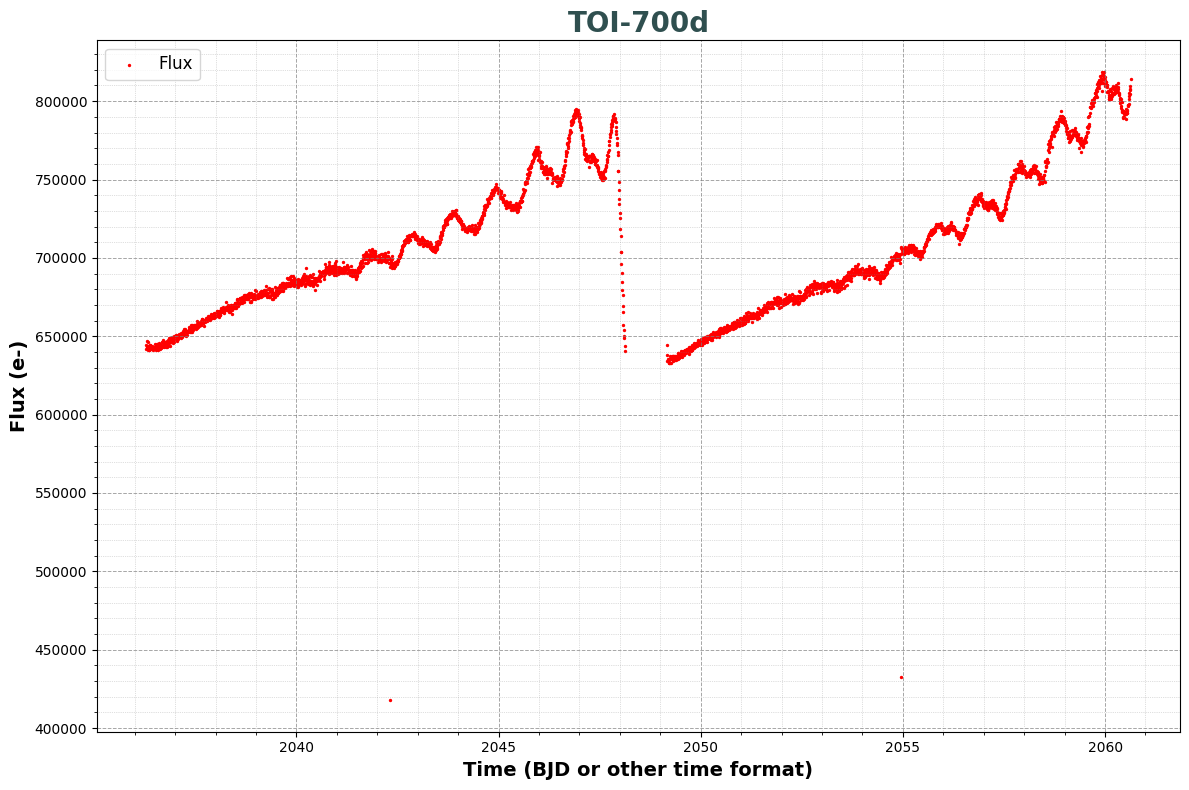

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits


fits_file ='/content/tica-s0027-4-3_97.096788_-65.579312_5x5_astrocut.fits'

with fits.open(fits_file) as hdul:

    hdul.info()

   # (assuming the lightcurve data is in the first extension)
    data = hdul[1].data


    time = data['TIME']
    flux = data['FLUX']

# Selecting the central pixel of the flux array , this is essential because time is a 1D array, and flux is a 5D array, thus fetching 2 coordinates!
central_flux = flux[:, 2, 2]  # Assuming a 5x5 array, (2, 2) is the central pixel


plt.figure(figsize=(12, 8))

# Use the central flux for plotting
plt.scatter(time, central_flux, s=2, color='Red', label='Flux')


plt.title('TOI-700d', fontsize=20, fontweight='bold', color='darkslategray')

plt.xlabel('Time (BJD or other time format)', fontsize=14, fontweight='bold', color='black')
plt.ylabel('Flux (e-)', fontsize=14, fontweight='bold', color='black')


plt.grid(which='both', linestyle='--', linewidth=0.7, color='gray', alpha=0.7)
plt.minorticks_on()
plt.grid(which='minor', linestyle=':', linewidth=0.5, color='gray', alpha=0.5)

plt.legend(fontsize=12)

plt.tight_layout()

plt.show()